<a href="https://colab.research.google.com/github/sbooeshaghi/seq.run/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
d = [[1,141,	173],
[10,478,	1731],
[100,3567,	17437],
[1000,35051,	175590],
[10000,349412,	1765980],
[100000,3465367,	17759901],
[1000000,34671273,	179306601],
[10000000,346591469,	1803454121],
  [462638208, 16788327951, 116792744826]]

In [45]:
def s(nreads, readLen, qscoreLen, headerLen, spacerLen, compressionRatio):
  estimatedSize = nreads * (readLength + qscoreLen + headerLen + spacerLen) * (1 / compressionRatio)
  return estimatedSize

basesPerRead = 62
readLength = basesPerRead + 1
qualityScoreLength = basesPerRead + 1
headerLength = 50 + 1
spacerLength = 1 + 1
compressionRatio = 5.2

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
df = pd.DataFrame(d, columns=["nreads","compressed","uncompressed"])

In [48]:
df["efficiency"] = df["compressed"] / df["uncompressed"]
df["ratio"] = df["uncompressed"] / df["compressed"]

df["psize"] = [s(i, readLength, qualityScoreLength, headerLength, spacerLength, compressionRatio) for i in df["nreads"]]
df["error"] = (df["psize"] - df["compressed"]) / df["compressed"]

In [49]:
df

,nreads,compressed,uncompressed,efficiency,ratio,psize,error
0,1,141,173,0.815029,1.226950,3.442308e+01,-0.755865
1,10,478,1731,0.276141,3.621339,3.442308e+02,-0.279852
2,100,3567,17437,0.204565,4.888422,3.442308e+03,-0.034957
3,1000,35051,175590,0.199618,5.009558,3.442308e+04,-0.017915
4,10000,349412,1765980,0.197857,5.054148,3.442308e+05,-0.014828
5,100000,3465367,17759901,0.195123,5.124970,3.442308e+06,-0.006654
6,1000000,34671273,179306601,0.193363,5.171619,3.442308e+07,-0.007159
7,10000000,346591469,1803454121,0.192182,5.203400,3.442308e+08,-0.006811
8,462638208,16788327951,116792744826,0.143745,6.956782,1.592543e+10,-0.051399


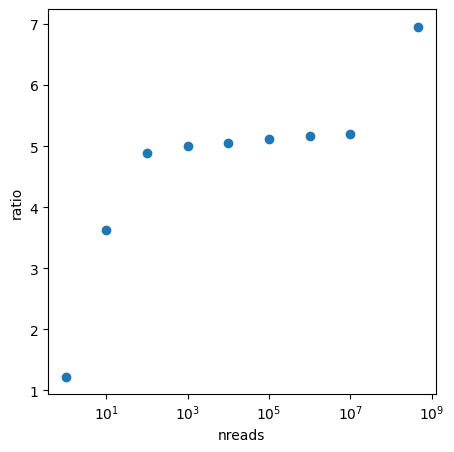

In [50]:
fig, ax = plt.subplots(figsize=(5,5))

x = df["nreads"]
y = df["ratio"]
ax.scatter(x,y)
ax.set(**{
    "xlabel": "nreads",
    "ylabel": "ratio",
    "xscale": "log",
})

fig.show()